# Yelp Data Challenge - Restaurant Recommender

BitTiger DS501

Nov 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from time import time

In [2]:
df = pd.read_csv('clean_busi_rev_joint.csv')

In [3]:
df.head()

,business_id,categories,city,name,review_count,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,--9e1ONYQuAa-CB_Rrw7Tw,"Steakhouses, Restaurants, Cajun/Creole",Las Vegas,Delmonico Steakhouse,1546,4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


## 1. Clean data and get rating data 

#### Select relevant columns in the original dataframe

In [3]:
# Get business_id, user_id, stars for recommender
selected_col=[u'business_id',u'user_id',u'stars']
df=df[selected_col]

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender

**Q**: How do we recommend to these users anyways?

In [5]:
# To be implemented

df_test=df[0:5000]

In [13]:
df_test.describe()

,stars
count,5000.000000
mean,3.836600
std,1.391362
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


#### Create utility matrix from records

In [ ]:
# To be implemented
df_utility = pd.pivot_table(data=df, 
                            values='stars', 
                            index='user_id', 
                            columns='business_id', 
                            fill_value=0)

In [7]:
df_utility.describe()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-AGdGGCeTS-njB_8GkUmjQ,-Bf8BQ3yMk8U2f45r2DRKw,-BmqghX1sv7sgsxOIS2yAg,...,-U7tvCtaraTQ9b0zBhpBMA,-Uix-n4Jqo4W7ERagC5qAA,-UtYWvCnUppcSaC_u1pTYQ,-WLrZPzjKfrftLWaCi1QZQ,-WQhVJnBmyapFn0digQJwg,-XKG6GamlSBwy5AcXQGAfA,-YCd2_DdJUeZx3RRcmIZ_g,-YWr1wm_NaAlgEf9TZzsMQ,-Ylpy3VyRWwubf9dysuwjQ,-_TSaVr53qiEGqMkwyEMaQ
count,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,...,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000
mean,0.352357,0.158602,0.110215,0.044251,0.040323,0.049835,0.332920,0.000207,0.067825,0.027502,...,0.222498,0.035980,0.002068,0.357527,0.009512,0.001241,0.005997,0.021505,0.180728,0.287428
std,1.206462,0.854134,0.684630,0.444786,0.372014,0.461325,1.168529,0.014380,0.531481,0.344957,...,0.839140,0.383674,0.101671,1.212895,0.211149,0.053796,0.137059,0.251475,0.846679,1.109559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000


In [16]:
df_utility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4836 entries, --IFH_sbTkfXxbXO4nSEyQ to zzo--VpSQh8PpsGVeMC1dQ
Data columns (total 49 columns):
--9e1ONYQuAa-CB_Rrw7Tw    4836 non-null int64
-1m9o3vGRA8IBPNvNqKLmA    4836 non-null int64
-3zffZUHoY8bQjGfPSoBKQ    4836 non-null int64
-8R_-EkGpUhBk55K9Dd4mg    4836 non-null int64
-9YyInW1wapzdNZrhQJ9dg    4836 non-null int64
-AD5PiuJHgdUcAK-Vxao2A    4836 non-null int64
-ADtl9bLp8wNqYX1k3KuxA    4836 non-null int64
-AGdGGCeTS-njB_8GkUmjQ    4836 non-null int64
-Bf8BQ3yMk8U2f45r2DRKw    4836 non-null int64
-BmqghX1sv7sgsxOIS2yAg    4836 non-null int64
-Bv-HHUs8aHzDrdWcZHn8w    4836 non-null int64
-C8sSrFqaCxp51pyo-fQLQ    4836 non-null int64
-CQokjildrY7UZezXCdEBw    4836 non-null int64
-CbDQXiuKzPQ0_jiUz03aw    4836 non-null int64
-EohS3nXZGl6odE9Lx5BSw    4836 non-null int64
-FNquqGseSCVMWo7KbK-Tg    4836 non-null int64
-FcZY7a7qgxTUlTvwuyJnQ    4836 non-null int64
-G7MPSNBpxRJmtrJxdwt7A    4836 non-null int64
-IWsoxH7mLJTTpU5MmWY4w    4836 

## 2. Item-Item similarity recommender

### Let's reuse the ItemItemRecommender class derived from previous exercise

Hint: we need to make modification to accommodate the dense numpy array

In [11]:
item_sim_matrix = cosine_similarity(df_utility.T)
item_sim_matrix

array([[1.        , 0.00947094, 0.01613644, ..., 0.        , 0.00570213,
        0.00401988],
       [0.00947094, 1.        , 0.01373288, ..., 0.        , 0.        ,
        0.        ],
       [0.01613644, 0.01373288, 1.        , ..., 0.        , 0.        ,
        0.00520431],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00570213, 0.        , 0.        , ..., 0.        , 1.        ,
        0.00333481],
       [0.00401988, 0.        , 0.00520431, ..., 0.        , 0.00333481,
        1.        ]])

### Other method to get the utility matrix

In [12]:
# To be implemented
highest_users_id = len(df_test['user_id'].unique())
highest_business_id = len(df_test['business_id'].unique())
ratings_matrix = sparse.lil_matrix((highest_users_id, highest_business_id))
ratings_matrix

<4836x49 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in LInked List format>

In [13]:
user_id_ls=df_test['user_id'].unique().tolist()
user_id_ls[0:10]
user_id_ls.index('ymlnR8UeFvB4FZL56tCZsA')
business_id_ls=df_test['business_id'].unique().tolist()

In [14]:
for _, row in df_test.iterrows():
    # subtract 1 from id's due to match 0 indexing
    ratings_matrix[user_id_ls.index(row.user_id), business_id_ls.index(row.business_id)] = row.stars

In [15]:
utility_mat = ratings_matrix

In [16]:
item_sim_mat = cosine_similarity(utility_mat.T)
item_sim_mat

array([[1.        , 0.00947094, 0.01613644, ..., 0.        , 0.00570213,
        0.00401988],
       [0.00947094, 1.        , 0.01373288, ..., 0.        , 0.        ,
        0.        ],
       [0.01613644, 0.01373288, 1.        , ..., 0.        , 0.        ,
        0.00520431],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00570213, 0.        , 0.        , ..., 0.        , 1.        ,
        0.00333481],
       [0.00401988, 0.        , 0.00520431, ..., 0.        , 0.00333481,
        1.        ]])

In [17]:
item_sim_mat==item_sim_matrix

array([[False,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True, False]])

In [18]:
least_to_most_sim_indexes = np.argsort(item_sim_mat, axis=1)

# Neighborhoods
neighborhood_size = 75
neighborhoods = least_to_most_sim_indexes[:, -neighborhood_size:]

In [19]:
neighborhoods.shape

(49, 49)

In [20]:
user_id = 100

In [21]:
n_users = utility_mat.shape[0]
n_items = utility_mat.shape[1]

start_time = time()
items_rated_by_this_user = ratings_matrix[user_id].nonzero()[1]
# Just initializing so we have somewhere to put rating preds
out = np.zeros(n_items)
for item_to_rate in range(n_items):
    relevant_items = np.intersect1d(neighborhoods[item_to_rate],
                                    items_rated_by_this_user,
                                    assume_unique=True)  # assume_unique speeds up intersection op
    out[item_to_rate] = ratings_matrix[user_id, relevant_items] * \
        item_sim_mat[item_to_rate, relevant_items] / \
        item_sim_mat[item_to_rate, relevant_items].sum()


pred_ratings = np.nan_to_num(out)
print(pred_ratings)
print("Execution time: %f seconds" % (time()-start_time))

[5. 5. 5. 5. 0. 0. 5. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0.
 0. 0. 0. 0. 0. 5. 0. 5. 0. 0. 5. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 5.
 5.]
Execution time: 0.020001 seconds


C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [22]:
pred_ratings.shape

(49,)

In [23]:
# Recommend n restaurants
n = 10

# Get item indexes sorted by predicted rating
item_index_sorted_by_pred_rating = list(np.argsort(pred_ratings))[::-1]

# Find restaurants that have been rated by user
items_rated_by_this_user = ratings_matrix[user_id].nonzero()[1]

# We want to exclude the items that have been rated by user
unrated_items_by_pred_rating = [item for item in item_index_sorted_by_pred_rating
                                if item not in items_rated_by_this_user]

unrated_items_by_pred_rating[:n]


[22, 48, 35, 1, 2, 3, 6, 12, 47, 29]

## 3. Matrix Factorization recommender

##### Compare two of the methods demoed in Practice Class: sklearn NMF, sklearn TruncatedSVD, or GraphLab
##### *Extra points for using GraphLab

### Sklearn NMF

In [43]:
# Compute NMF
from sklearn.decomposition import NMF

def fit_nmf(k):
    nmf = NMF(n_components=k)
    nmf.fit(df_utility)
    W = nmf.transform(df_utility);
    H = nmf.components_;
    return nmf.reconstruction_err_

error = [fit_nmf(i) for i in range(1,50)]


In [52]:
print(len(W),len(H))

4836 100


Text(0,0.5,'Reconstruction Errror')

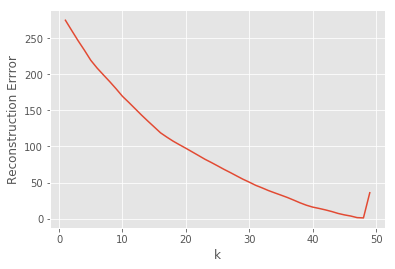

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline


plt.plot(range(1,50), error)
plt.xlabel('k')
plt.ylabel('Reconstruction Errror')

In [53]:
# Fit using 50 hidden concepts
nmf = NMF(n_components=30)
nmf.fit(df_utility)
W = nmf.transform(df_utility);
H = nmf.components_;
print('RSS = %.2f' % nmf.reconstruction_err_)

RSS = 50.52


In [54]:
print(len(W),len(H))

4836 30


In [55]:
# Make interpretable
restaurants = df_test['business_id'].unique()
users = df_test['user_id'].unique()

W, H = (np.around(x,2) for x in (W,H))
W = pd.DataFrame(W, index=users)
H = pd.DataFrame(H, columns=restaurants)

print(W) 
print(H)

                          0     1     2     3     4     5     6     7     8   \
ymlnR8UeFvB4FZL56tCZsA  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
9pSSL6X6lFpY3FCRLEH3og  0.00  0.00  0.00  0.00  0.00  0.00  0.51  0.00  0.00   
gm8nNoA3uB4In5o_Hxpq3g  0.00  0.00  0.55  0.00  0.00  0.00  0.00  0.00  0.00   
CEtidlXNyQzgJSdF1ubPFw  0.00  0.54  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
9_BhDyzJYf2JwTD9TyXJ4g  0.00  0.00  0.00  0.00  0.00  0.00  0.51  0.00  0.00   
cZVQGCZ_fHtTdfiyGVJPdg  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
rhP3yu4Sxpj9OXgeY0VpLg  0.00  0.00  0.00  0.45  0.00  0.00  0.00  0.00  0.00   
li2cBZl60vgqihDJJG7jeA  0.00  0.00  0.00  0.00  0.45  0.00  0.00  0.00  0.00   
zGipc5uOJrejX6KkUsSNpA  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.01   
aVOGlN9fZ-BXcbtj6dbf0g  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Lgmfl_A0cy72dwZfbuh9Tg  0.00  0.00  0.00  0.00  0.45  0.00  0.00  0.00  0.00   
fFf4IR39UYbwc8nIg9ffNQ  0.00  0.00  0.00

In [56]:
# Verify reconstruction
print(np.around(W.dot(H),2))
print(pd.DataFrame(df_utility, index=users, columns=restaurants))

                        --9e1ONYQuAa-CB_Rrw7Tw  -1m9o3vGRA8IBPNvNqKLmA  \
ymlnR8UeFvB4FZL56tCZsA                    0.00                    0.00   
9pSSL6X6lFpY3FCRLEH3og                    0.00                    0.00   
gm8nNoA3uB4In5o_Hxpq3g                    0.00                    0.00   
CEtidlXNyQzgJSdF1ubPFw                    5.04                    0.00   
9_BhDyzJYf2JwTD9TyXJ4g                    0.00                    0.00   
cZVQGCZ_fHtTdfiyGVJPdg                    0.00                    0.00   
rhP3yu4Sxpj9OXgeY0VpLg                    0.00                    0.00   
li2cBZl60vgqihDJJG7jeA                    0.00                    0.00   
zGipc5uOJrejX6KkUsSNpA                    0.00                    0.00   
aVOGlN9fZ-BXcbtj6dbf0g                    0.00                    0.00   
Lgmfl_A0cy72dwZfbuh9Tg                    0.00                    0.00   
fFf4IR39UYbwc8nIg9ffNQ                    0.00                    0.00   
nGw_csaHeNdtb3IpSmtuGA                

### SVD

In [57]:
# Compare to SVD
from numpy.linalg import svd
k = 30

# Compute SVD
U, sigma, VT = svd(df_utility)

# Make pretty
U, sigma, VT = (np.around(x,2) for x in (U,sigma,VT))
U = pd.DataFrame(U, index=users)
VT = pd.DataFrame(VT, columns=restaurants)

# Keep top two concepts
U = U.iloc[:,:k]
sigma = sigma[:k]
VT = VT.iloc[:k,:]

print(U)
print(sigma)
print(VT)

                          0     1     2     3     4     5     6     7     8   \
ymlnR8UeFvB4FZL56tCZsA -0.00  0.00  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00   
9pSSL6X6lFpY3FCRLEH3og -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.06 -0.00 -0.00   
gm8nNoA3uB4In5o_Hxpq3g -0.00  0.01  0.06  0.00 -0.00  0.00  0.00  0.00  0.00   
CEtidlXNyQzgJSdF1ubPFw -0.01  0.06 -0.01  0.00 -0.00  0.00 -0.00  0.00 -0.00   
9_BhDyzJYf2JwTD9TyXJ4g -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.06 -0.00 -0.00   
cZVQGCZ_fHtTdfiyGVJPdg -0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00   
rhP3yu4Sxpj9OXgeY0VpLg -0.00  0.00  0.00 -0.05  0.00  0.00  0.00  0.00 -0.00   
li2cBZl60vgqihDJJG7jeA -0.00  0.00  0.00  0.00  0.05  0.00  0.00 -0.00  0.00   
zGipc5uOJrejX6KkUsSNpA -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00   
aVOGlN9fZ-BXcbtj6dbf0g -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00  0.00   
Lgmfl_A0cy72dwZfbuh9Tg -0.00  0.00  0.00  0.00  0.05  0.00  0.00 -0.00  0.00   
fFf4IR39UYbwc8nIg9ffNQ -0.00  0.00  0.00

## 4. Other recommenders (optional)

What are other ways you can build a better recommender?

* Other features (have you noticed there are other features in the Yelp dataset, e.g. tips, etc.?)
* Popularity-based
* Content-based
* Hybrid